In [193]:
%matplotlib inline

In [194]:
#导入包
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [195]:
#对率函数
def h(x,w):
    if(len(x)!=len(w)):
        raise "w和x长度不同"
    e = np.exp(-x.dot(w))
    return 1/(1+e)
#选取部分数据
def select(X,y,num=100):
    selection_X = []
    selection_y = []
    selectIndex = np.random.randint(0,len(X),num)
    for i in selectIndex:
        selection_X.append(X[i])
        selection_y.append(y[i])
    return np.array(selection_X),np.array(selection_y)
def gradient(X,w,y):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    sum = 0
    for i in range(len(y)):
        sum += (h(X[i],w)-y[i])*X[i]
    return sum/len(y)
def NAGOptimizer(X,w,y,trend):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    a = 0.5
    b = 0.05

    trend = a*trend + gradient(X,w - a * b * trend,y)
    w = w - b * trend
    return w,trend
def loss_function(X,w,y):
    sum = 0
    for i in range(len(y)):
        if(y[i]==0):
            sum+=np.log(1-h(X[i],w))
        else:
            sum+=np.log(h(X[i],w))
    return -sum/len(y)

Text(0,0.5,'NAG loss')

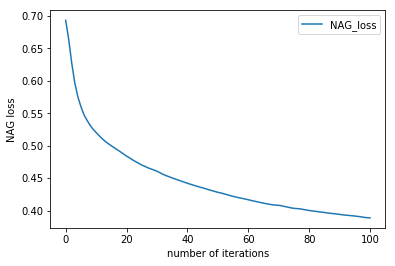

In [196]:
#读取训练数据
X_train,y_train = load_svmlight_file("a9a.txt")
X_train = X_train.toarray()
for i in range(len(y_train)):
    if(y_train[i]==-1):
        y_train[i]=0
#读取验证数据
X_validation,y_validation = load_svmlight_file("a9a.t")
X_validation = X_validation.toarray()
for i in range(len(y_validation)):
    if(y_validation[i]==-1):
        y_validation[i]=0
#补全特征特征
ones = [[1]]*len(X_train)
X_train = np.concatenate((X_train,ones),axis = 1)
zeros = [[0]]*len(X_validation)
X_validation = np.concatenate((X_validation,zeros),axis = 1)
ones = [[1]]*len(X_validation)
X_validation = np.concatenate((X_validation,ones),axis = 1)
#参数初始化
w = np.zeros(len(X_train[0]))

#进行NAG优化
trend = w.copy()
NAG_loss = [loss_function(X_validation,w,y_validation)]
for i in range(100):
    part_X,part_y = select(X_train,y_train)
    w,trend = NAGOptimizer(part_X,w,part_y,trend)
    NAG_loss.append(loss_function(X_validation,w,y_validation))

plt.plot(range(101),NAG_loss ,label="NAG_loss",)
plt.legend(loc = "best")
ax = plt.gca()
ax.set_xlabel("number of iterations")
ax.set_ylabel("NAG loss")